## Import Libraries

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import math
from math import sqrt as sq

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns
sns.set(style = "white", color_codes = True)
sns.set(font_scale = 1.5)

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

Import csv file containing heart disease dataset

In [66]:
df = pd.read_excel('Heart_dirty_datasets.xlsx')

# View datasets
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,Typical Angina,125,212,<=120mg/dl,ST-T Wave Abnormality,168,No,1.0,Downsloping,2,Reversible Defect,Normal
1,53,Male,Typical Angina,140,203,>120mg/dl,Normal,155,Yes,3.1,Upsloping,0,Reversible Defect,Normal
2,70,Male,Typical Angina,145,174,<=120mg/dl,ST-T Wave Abnormality,125,Yes,2.6,Upsloping,0,Reversible Defect,Normal
3,61,Male,Typical Angina,148,203,<=120mg/dl,ST-T Wave Abnormality,161,No,0.0,Downsloping,1,Reversible Defect,Normal
4,62,Female,Typical Angina,138,294,>120mg/dl,ST-T Wave Abnormality,106,No,1.9,Flat,3,Normal Blood Flow,Normal


## Description of dataset df
Import csv file containing description of each fields in dataset.

In [67]:
description = pd.read_csv('heart-glossary.csv')

# View description of the dataset
description

,Column,Source,Description,Remarks
0,age,UCI Machine Learning Repository,Age of patient,Unit in Years
1,sex,UCI Machine Learning Repository,"Sex of the patient (Male, Female)",Male or Female
2,cp,UCI Machine Learning Repository,Chestpain Type,"Typical Angina (TA), Atypical Angina (ATA), No..."
3,tresbps,UCI Machine Learning Repository,Resting blood pressure (On admission to the ho...,Unit in mm Hg
4,chol,UCI Machine Learning Repository,Serum cholesterol,Unit in mm/dl
5,fbs,UCI Machine Learning Repository,Fasting blood sugar. More than 120mg/dl consid...,>120mg/dl or <=120mg/dl
6,restecg,UCI Machine Learning Repository,Resting electrocardiogram results,"Normal, ST-T wave abnormality, Left ventricula..."
7,thalach,UCI Machine Learning Repository,MaxHR: maximum heart rate achieved,Numeric value between 60 and 202
8,exang,UCI Machine Learning Repository,ExerciseAngina: exercise-induced angina,Yes or No
9,oldpeak,UCI Machine Learning Repository,ST depression induced by exercise relative to ...,Numeric value measured in depression


## Data Cleaning and Transformation

In [68]:
# View dataframe dimension
df.shape

(1025, 14)

In [69]:
# View datatype
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target       object
dtype: object

## Categorizing Data

In [70]:
# Categorizing Sex into Female and Male
# Female: 0
# Male: 1
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'Male' else 0) 

# Categorizing Chest Pain
# Typical Angina: 0, Atypical Angina: 1, 
# Non Anginal Pain: 2, Asymptomatic: 3
df['cp'] = df['cp'].apply(lambda x: 1 if x == 'Atypical Angina' else (0 if x == 'Typical Angina' else (2 if x == 'Non-Anginal Pain' else 3)))

# Categorizing Fasting Blood Sugar into 
# Normal: 0,
# Prediabetec: 1
df['fbs'] = df['fbs'].apply(lambda x: 1 if x == '>120mg/dl' else 0)

# Categorizing Resting ECG into 
# Normal: 0, ST-T Wave Abnormaility: 1, 
# Probable/Definite Left Ventricular Hypertrophy: 2
df['restecg'] = df['restecg'].apply(lambda x: 1 if x == 'ST-T Wave Abnormality' else (0 if x == 'Normal' else 2))

# Categorizing Exercise Induced Angina into 
# No: 0
# Yes: 1
df['exang'] = df['exang'].apply(lambda x: 1 if x == 'Yes' else 0)

# Categorizing Slope of Peak Exercise ST Segment
# Upsloping: 1, Flat: 2
# Downsloping: 3
df['slope'] = df['slope'].apply(lambda x: 1 if x == 'Flat' else (0 if x == 'Upsloping' else 2))

# Categorizing Thalassemia Blood Disorder into
# Dropped Dataset: 0, Fixed Defect: 1, 
# Normal Blood Flow: 2, Reversible Defect: 3
df['thal'] = df['thal'].apply(lambda x: 1 if x == 'Fixed Defect' else (0 if x == 'Null' else (2 if x == 'Normal Blood Flow' else 3)))

# Categorizing into people that have heart disease: 0
# and Normal: 1
df['target'] = df['target'].apply(lambda x: 1 if x == 'Heart Disease' else 0)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Renaming Fields

In [79]:
df = df.rename(columns={'cp' : 'chest_pain_type', 'trestbps' : 'resting_blood_pressure',
                       'chol' : 'cholestrol', 'fbs' : 'prediabetic', 'restecg' : 'resting_ecg',
                       'thalach' : 'max_heart_rate', 'exang' : 'exercise_induced_angina',
                       'oldpeak' : 'depression_level', 'slope' : 'st_slope',
                       'ca' : 'numbers_of_colored_vessels', 'thal' : 'thalassemia_disorder',
                       'target' : 'have_heart_disease'})
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,prediabetic,resting_ecg,max_heart_rate,exercise_induced_angina,depression_level,st_slope,numbers_of_colored_vessels,thalassemia_disorder,have_heart_disease
0,52,1,0,125,212,False,1,168,False,1.0,2,2,3,False
1,53,1,0,140,203,True,0,155,True,3.1,0,0,3,False
2,70,1,0,145,174,False,1,125,True,2.6,0,0,3,False
3,61,1,0,148,203,False,1,161,False,0.0,2,1,3,False
4,62,0,0,138,294,True,1,106,False,1.9,1,3,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,False,1,164,True,0.0,2,0,2,True
1021,60,1,0,125,258,False,0,141,True,2.8,1,1,3,False
1022,47,1,0,110,275,False,0,118,True,1.0,1,1,2,False
1023,50,0,0,110,254,False,0,159,False,0.0,2,0,2,True


## Converting Datatype

In [81]:
columns_to_convert_bool = ['prediabetic', 'exercise_induced_angina', 'have_heart_disease']
df[columns_to_convert_bool] = df[columns_to_convert_bool].astype('bool')
print(df.dtypes)

age                             int64
sex                             int64
chest_pain_type                 int64
resting_blood_pressure          int64
cholestrol                      int64
prediabetic                      bool
resting_ecg                     int64
max_heart_rate                  int64
exercise_induced_angina          bool
depression_level              float64
st_slope                        int64
numbers_of_colored_vessels      int64
thalassemia_disorder            int64
have_heart_disease               bool
dtype: object


In [85]:
# Check for missing cell
missingdata_percentage_bycolumn = df.isnull().sum().sort_values(ascending = False)/len(df)
print(missingdata_percentage_bycolumn)

df.isnull().sum()

age                           0.0
sex                           0.0
chest_pain_type               0.0
resting_blood_pressure        0.0
cholestrol                    0.0
prediabetic                   0.0
resting_ecg                   0.0
max_heart_rate                0.0
exercise_induced_angina       0.0
depression_level              0.0
st_slope                      0.0
numbers_of_colored_vessels    0.0
thalassemia_disorder          0.0
have_heart_disease            0.0
dtype: float64


age                           0
sex                           0
chest_pain_type               0
resting_blood_pressure        0
cholestrol                    0
prediabetic                   0
resting_ecg                   0
max_heart_rate                0
exercise_induced_angina       0
depression_level              0
st_slope                      0
numbers_of_colored_vessels    0
thalassemia_disorder          0
have_heart_disease            0
dtype: int64

In [86]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,resting_ecg,max_heart_rate,depression_level,st_slope,numbers_of_colored_vessels,thalassemia_disorder
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.529756,149.114146,1.071512,1.385366,0.754146,2.323902
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.527878,23.005724,1.175053,0.617755,1.030798,0.620660
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,132.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,1.000000,152.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,1.000000,166.000000,1.800000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,2.000000,202.000000,6.200000,2.000000,4.000000,3.000000


## Visualisation of Data

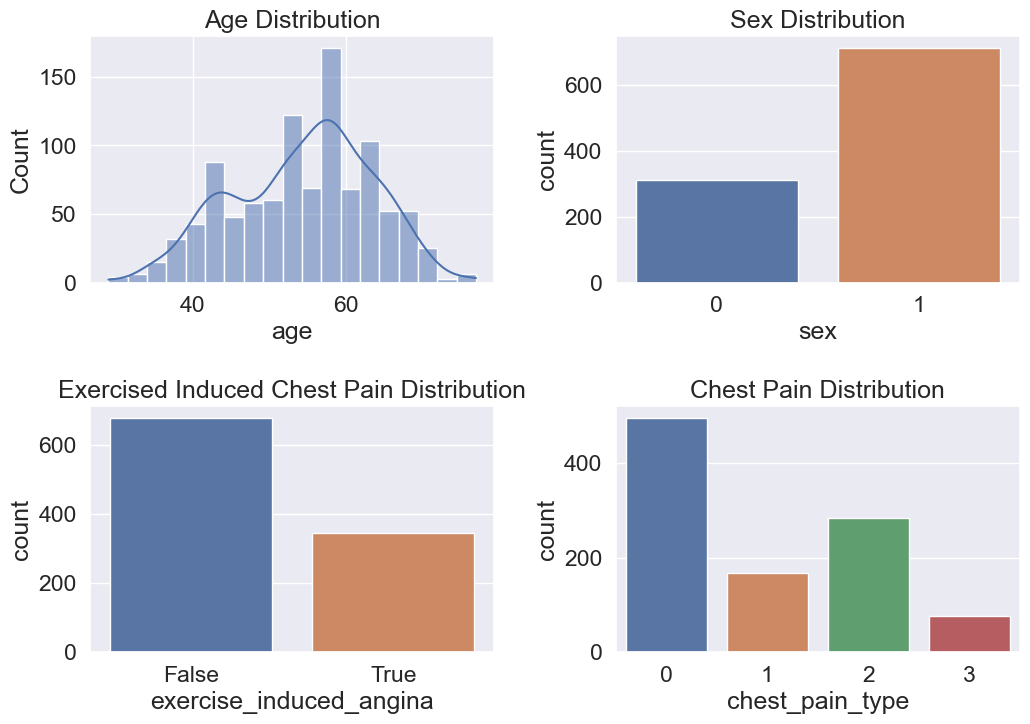

In [87]:
fig, axes = plt.subplots(figsize=(12, 8), nrows=2, ncols=2)

sns.histplot(data=df, x='age', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.countplot(data=df, x='sex', ax=axes[0, 1])
axes[0, 1].set_title('Sex Distribution')

sns.countplot(data=df, x='exercise_induced_angina', ax=axes[1, 0])
axes[1, 0].set_title('Exercised Induced Chest Pain Distribution')

sns.countplot(data=df, x='chest_pain_type', ax=axes[1, 1])
axes[1, 1].set_title('Chest Pain Distribution')

plt.subplots_adjust(hspace=0.5, wspace=0.3)

## Correlation between Fields

In [88]:
df.corr()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,prediabetic,resting_ecg,max_heart_rate,exercise_induced_angina,depression_level,st_slope,numbers_of_colored_vessels,thalassemia_disorder,have_heart_disease
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
chest_pain_type,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
resting_blood_pressure,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
cholestrol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
prediabetic,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
resting_ecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
max_heart_rate,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exercise_induced_angina,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
depression_level,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


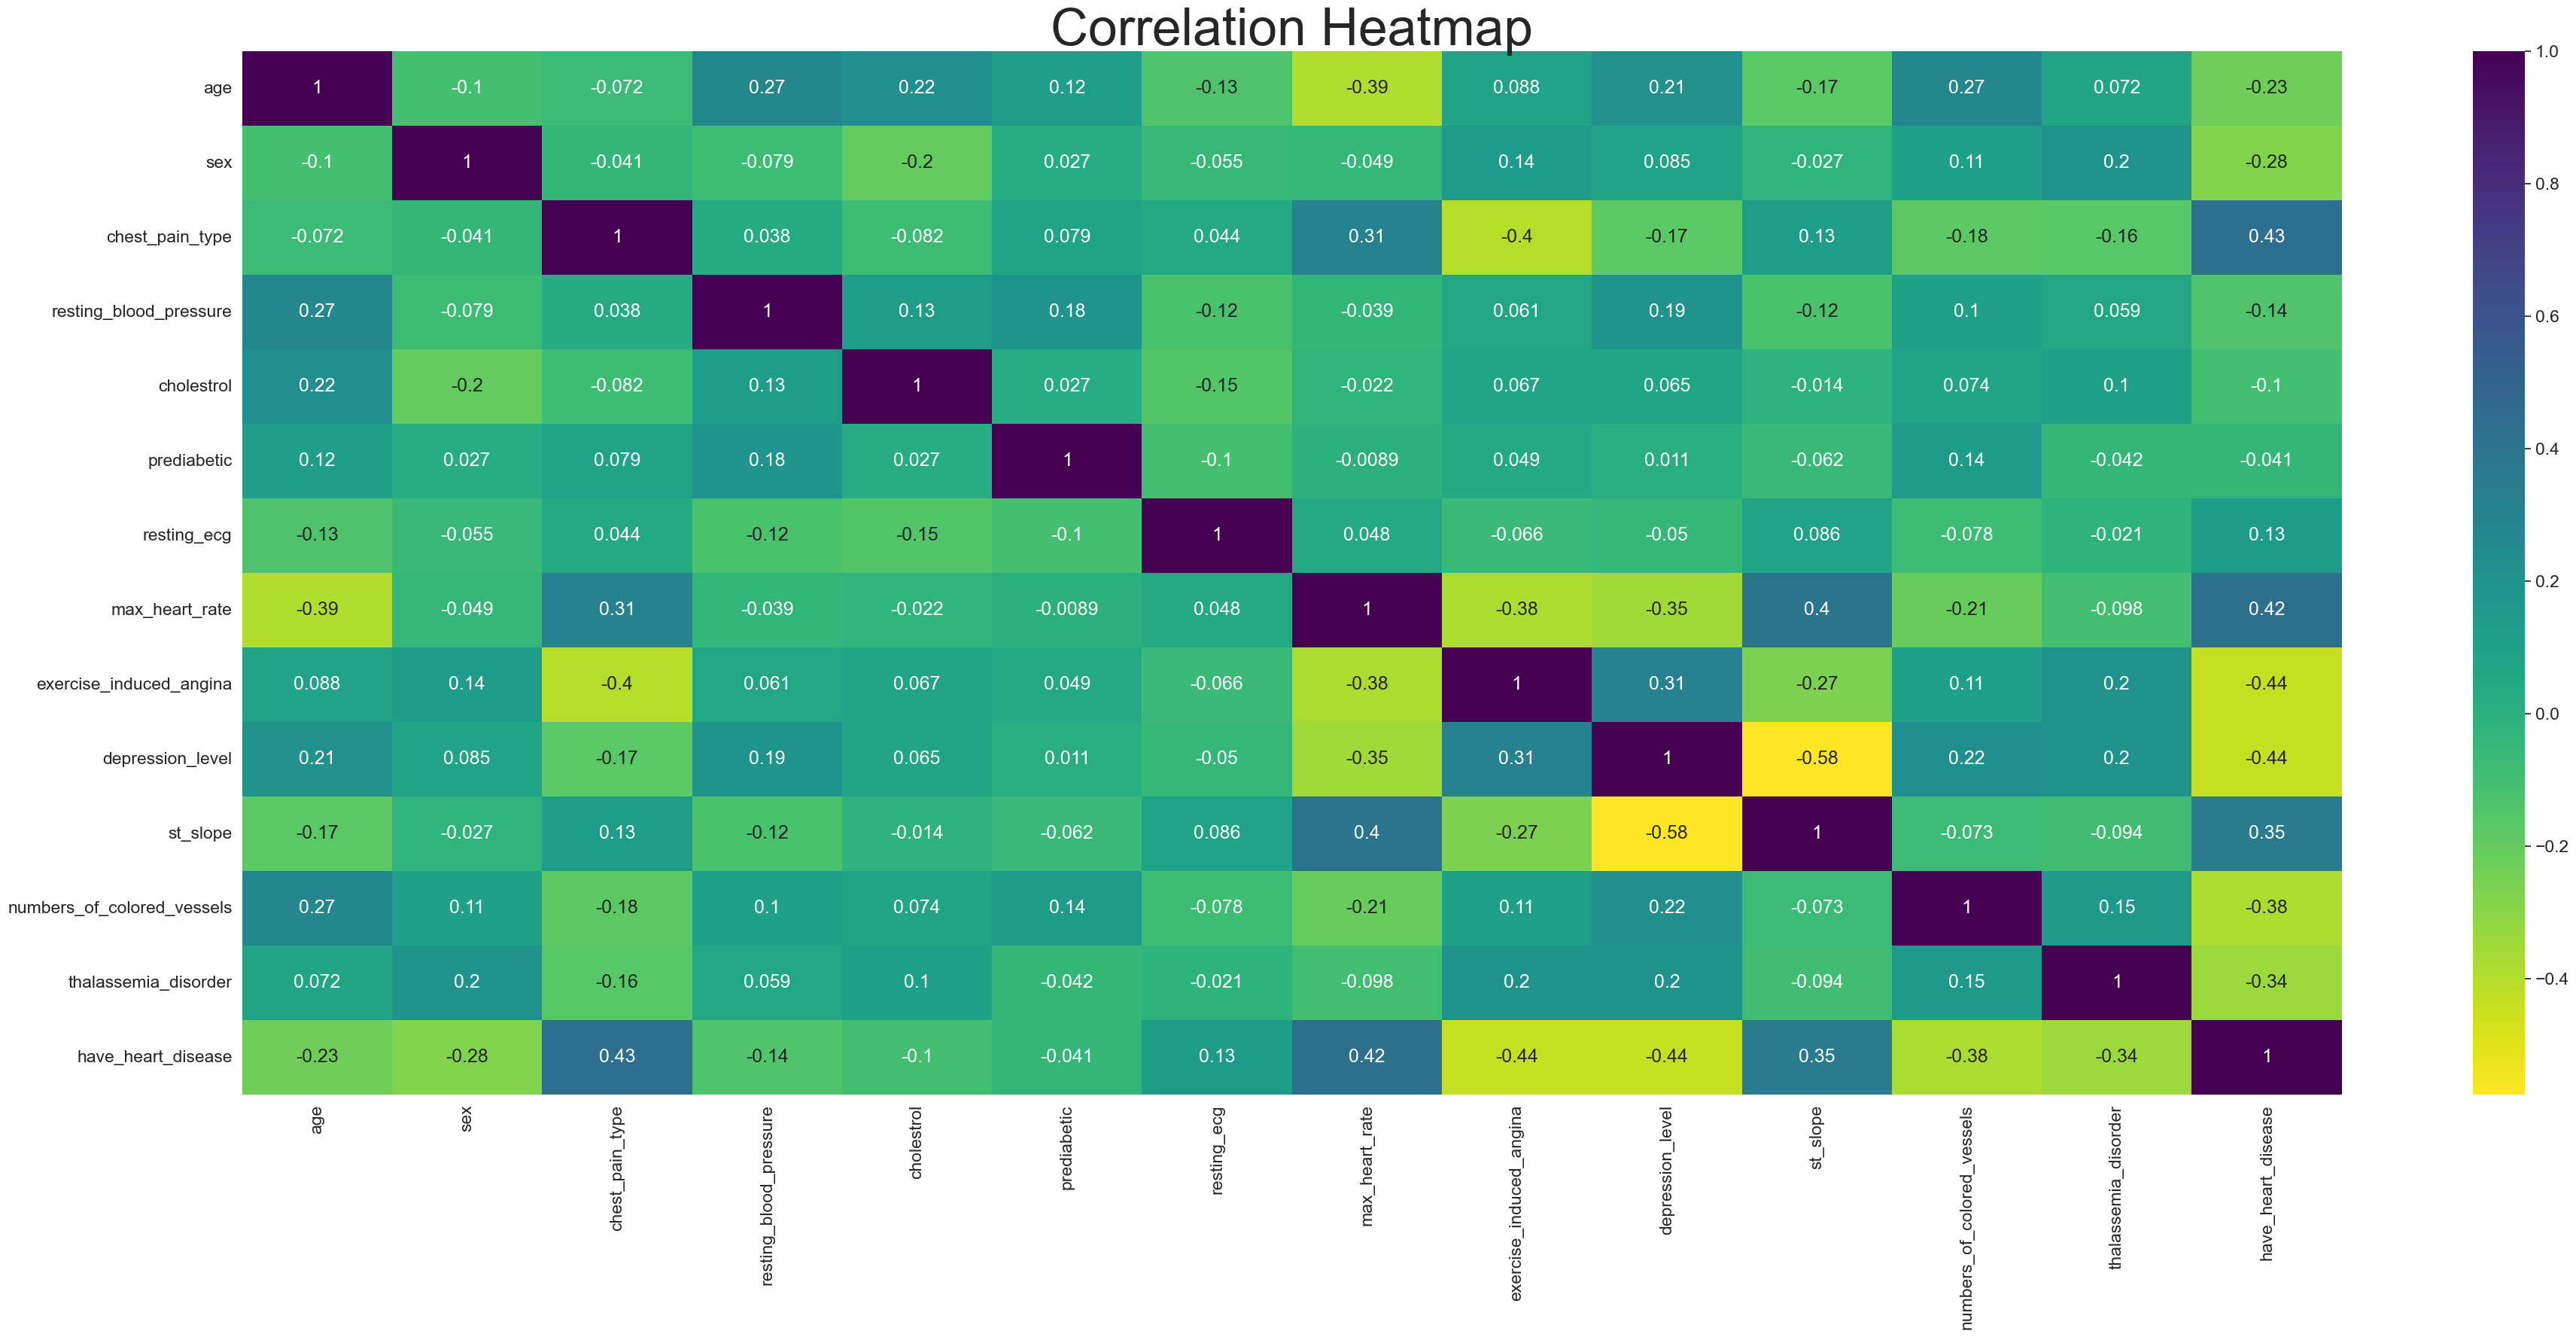

In [89]:
plt.figure(figsize = (45, 18))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis_r')
plt.title("Correlation Heatmap", fontsize = 50)
plt.show()